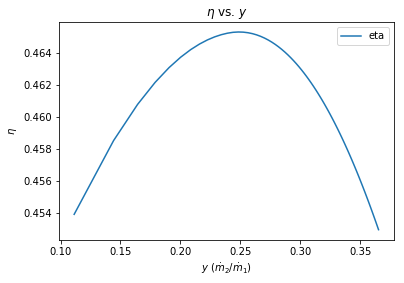

In [9]:
from thermostate import State, Q_, units
from numpy import arange
from math import pi
#___________________________________
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.special as special
import numpy as np

substance = 'water'
T_1 = Q_(560.0, 'degC') 
p_1 = Q_(16.0, 'MPa') 
mdot_1 = Q_(120.0, 'kg/s') 
p_2 = Q_(1.0, 'MPa')
p_3 = Q_(8.0, 'kPa')
x_4 = Q_(0.0, 'percent') 
x_6 = Q_(0.0, 'percent') 
p_low = Q_(0.1, 'MPa') 
p_high = Q_(7.5, 'MPa')

# State 1
st_1 = State(substance, T=T_1, p=p_1)
h_1 = st_1.h
s_1 = st_1.s

# State 3
s_3 = s_2
st_3 = State(substance, p=p_3, s=s_3)
h_3 = st_3.h

# State 4
p_4 = p_3
st_4 = State(substance, p=p_4, x=x_4)
h_4 = st_4.h
s_4 = st_4.s

y_l = []
eta_l = []
for p_2 in arange(0.1, 7.6, 0.1)*units.MPa:
# State 2
    s_2 = s_1
    st_2 = State(substance, p=p_2, s=s_2)
    h_2 = st_2.h
# State 5
    p_5 = p_2
    s_5 = s_4
    st_5 = State(substance, p=p_5, s=s_5)
    h_5 = st_5.h
# State 6
    p_6 = p_2
    st_6 = State(substance, p=p_6, x=x_6)
    h_6 = st_6.h
    s_6 = st_6.s
# State 7
    p_7 = p_1
    s_7 = s_6
    st_7 = State(substance, p=p_7, s=s_7)
    h_7 = st_7.h
    y = (h_6 - h_5)/(h_2 - h_5)
    y_l.append(y)
    Wdot_net = (mdot_1*(h_1 - h_2 + (1 - y)*(h_2 - h_3) + (1 - y)*(h_4 - h_5) + (h_6 - h_7))).to('MW') 
    Qdot_in = (mdot_1*(h_1 - h_7)).to('MW')
    eta = Wdot_net/Qdot_in
    eta_l.append(eta)
%matplotlib inline
plt.plot(y_l, eta_l, label='eta') 
plt.legend(loc='best') 
plt.title('$\eta$ vs. $y$')
plt.xlabel('$y$ ($\dot{m}_2/\dot{m}_1$)') 
plt.ylabel('$\eta$');